<a href="https://colab.research.google.com/github/JoseManu96/Sales_forecasting/blob/main/sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

df = pd.read_csv('train.csv')
df

store  item        date  sales
0          2    28    1/1/2013     45
1          2    28    1/2/2013     53
2          2    28    1/3/2013     65
3          2    28    1/4/2013     66
4          2    28    1/5/2013     97
...      ...   ...         ...    ...
91295      4    18  12/27/2017     70
91296      4    18  12/28/2017     88
91297      4    18  12/29/2017     67
91298      4    18  12/30/2017     92
91299      4    18  12/31/2017     85

[91300 rows x 4 columns]

In [15]:
num_stores = len(df['store'].unique())
num_stores

6

In [16]:
num_items = len(df['item'].unique())
num_items

15

In [14]:
for store in df['store'].unique():
  num_product = len(df[df['store'] == store]['item'].unique())
  print("Store ID:{} tiene {} productos".format(store, num_product))

Store ID:2 tiene 15 productos
Store ID:8 tiene 11 productos
Store ID:3 tiene 8 productos
Store ID:10 tiene 8 productos
Store ID:9 tiene 4 productos
Store ID:4 tiene 4 productos


In [24]:
def format_date(date):
  
  new_d = date.split('/')
  new_date = new_d[2] + '-' + new_d[0] +  '-' + new_d[1]
  return new_date

df['date'] = df['date'].apply(format_date)  
df

store  item        date  sales
0          2    28    2013-1-1     45
1          2    28    2013-1-2     53
2          2    28    2013-1-3     65
3          2    28    2013-1-4     66
4          2    28    2013-1-5     97
...      ...   ...         ...    ...
91295      4    18  2017-12-27     70
91296      4    18  2017-12-28     88
91297      4    18  2017-12-29     67
91298      4    18  2017-12-30     92
91299      4    18  2017-12-31     85

[91300 rows x 4 columns]

In [25]:
# import related libraries

# dates
from pandas import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# prophet by Facebook
from fbprophet import Prophet

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [26]:
print("Check imported data")
print()
print("In total:")
print("train.shape {} ".format(df.shape))
print()
print("train.columns {} ".format(df.columns))
print()
print("train.index {} ".format(df.index))

Check imported data

In total:
train.shape (91300, 4) 

train.columns Index(['store', 'item', 'date', 'sales'], dtype='object') 

train.index RangeIndex(start=0, stop=91300, step=1) 


In [27]:
pd.set_option("display.max_rows", 20)

In [28]:
df.head(500)

store  item       date  sales
0        2    28   2013-1-1     45
1        2    28   2013-1-2     53
2        2    28   2013-1-3     65
3        2    28   2013-1-4     66
4        2    28   2013-1-5     97
..     ...   ...        ...    ...
495      2    28  2014-5-11    151
496      2    28  2014-5-12     86
497      2    28  2014-5-13    102
498      2    28  2014-5-14    109
499      2    28  2014-5-15    117

[500 rows x 4 columns]

In [30]:
df[df.isna().any(axis=1)]

Empty DataFrame
Columns: [store, item, date, sales]
Index: []

In [31]:
# describe - note, store and item are factor
df.describe()

store          item         sales
count  91300.000000  91300.000000  91300.000000
mean       5.480000     23.140000     96.720438
std        3.232602     10.645264     26.580339
min        2.000000      8.000000     26.000000
25%        2.000000     15.000000     77.000000
50%        4.000000     22.000000     95.000000
75%        8.000000     28.000000    114.000000
max       10.000000     45.000000    231.000000

In [32]:
pd.set_option("display.precision", 1)

In [39]:
# Pivot
pd.pivot_table(df[['store','item','sales']], index='item', columns='store', aggfunc='count')

sales                                        
store      2       3       4       8       9       10
item                                                 
8      1826.0     NaN     NaN  1826.0     NaN     NaN
10     1826.0     NaN     NaN  1826.0     NaN     NaN
11     1826.0     NaN     NaN     NaN     NaN     NaN
12     1826.0     NaN     NaN     NaN     NaN     NaN
13     1826.0  1826.0  1826.0  1826.0  1826.0  1826.0
15     1826.0  1826.0  1826.0  1826.0  1826.0  1826.0
18     1826.0  1826.0  1826.0  1826.0  1826.0  1826.0
22     1826.0  1826.0     NaN  1826.0     NaN  1826.0
25     1826.0  1826.0     NaN  1826.0     NaN  1826.0
28     1826.0  1826.0  1826.0  1826.0  1826.0  1826.0
29     1826.0     NaN     NaN     NaN     NaN     NaN
33     1826.0     NaN     NaN     NaN     NaN     NaN
36     1826.0     NaN     NaN  1826.0     NaN     NaN
38     1826.0  1826.0     NaN  1826.0     NaN  1826.0
45     1826.0  1826.0     NaN  1826.0     NaN  1826.0

In [40]:
pd.pivot_table(df[['store','item','sales']], index='item', columns='store', aggfunc='min')

sales                              
store    2     3     4     8     9     10
item                                     
8      35.0   NaN   NaN  29.0   NaN   NaN
10     33.0   NaN   NaN  32.0   NaN   NaN
11     37.0   NaN   NaN   NaN   NaN   NaN
12     26.0   NaN   NaN   NaN   NaN   NaN
13     38.0  34.0  30.0  35.0  32.0  30.0
15     44.0  41.0  36.0  39.0  30.0  33.0
18     39.0  30.0  32.0  43.0  33.0  32.0
22     34.0  28.0   NaN  31.0   NaN  33.0
25     38.0  36.0   NaN  32.0   NaN  27.0
28     43.0  37.0  29.0  40.0  27.0  34.0
29     33.0   NaN   NaN   NaN   NaN   NaN
33     32.0   NaN   NaN   NaN   NaN   NaN
36     40.0   NaN   NaN  37.0   NaN   NaN
38     36.0  28.0   NaN  34.0   NaN  31.0
45     32.0  32.0   NaN  34.0   NaN  31.0

In [41]:
pd.pivot_table(df[['store','item','sales']], index='item', columns='store', aggfunc='max')

sales                                   
store     2      3      4      8      9      10
item                                           
8      181.0    NaN    NaN  176.0    NaN    NaN
10     175.0    NaN    NaN  174.0    NaN    NaN
11     167.0    NaN    NaN    NaN    NaN    NaN
12     170.0    NaN    NaN    NaN    NaN    NaN
13     210.0  186.0  169.0  199.0  178.0  181.0
15     231.0  196.0  180.0  200.0  172.0  183.0
18     208.0  176.0  166.0  193.0  187.0  175.0
22     214.0  183.0    NaN  184.0    NaN  164.0
25     193.0  181.0    NaN  178.0    NaN  166.0
28     206.0  189.0  186.0  204.0  195.0  187.0
29     173.0    NaN    NaN    NaN    NaN    NaN
33     169.0    NaN    NaN    NaN    NaN    NaN
36     188.0    NaN    NaN  173.0    NaN    NaN
38     188.0  182.0    NaN  176.0    NaN  166.0
45     205.0  169.0    NaN  191.0    NaN  171.0

In [42]:
pd.pivot_table(df[['store','item','sales']], index='item', columns='store', aggfunc='median')

sales                               
store     2     3     4      8     9     10
item                                       
8       98.0   NaN   NaN   93.0   NaN   NaN
10      92.0   NaN   NaN   89.0   NaN   NaN
11      88.0   NaN   NaN    NaN   NaN   NaN
12      89.0   NaN   NaN    NaN   NaN   NaN
13     107.0  94.0  87.0  103.0  87.0  93.0
15     111.0  99.0  91.0  107.0  92.0  99.0
18     106.0  95.5  87.0  103.0  87.0  93.0
22     102.0  91.0   NaN   97.0   NaN  90.0
25     102.0  91.0   NaN   98.0   NaN  89.0
28     111.0  99.0  91.0  107.0  92.0  97.0
29      88.0   NaN   NaN    NaN   NaN   NaN
33      87.0   NaN   NaN    NaN   NaN   NaN
36      98.0   NaN   NaN   93.0   NaN   NaN
38     103.0  91.0   NaN   98.0   NaN  88.0
45     102.0  91.0   NaN   98.0   NaN  89.0

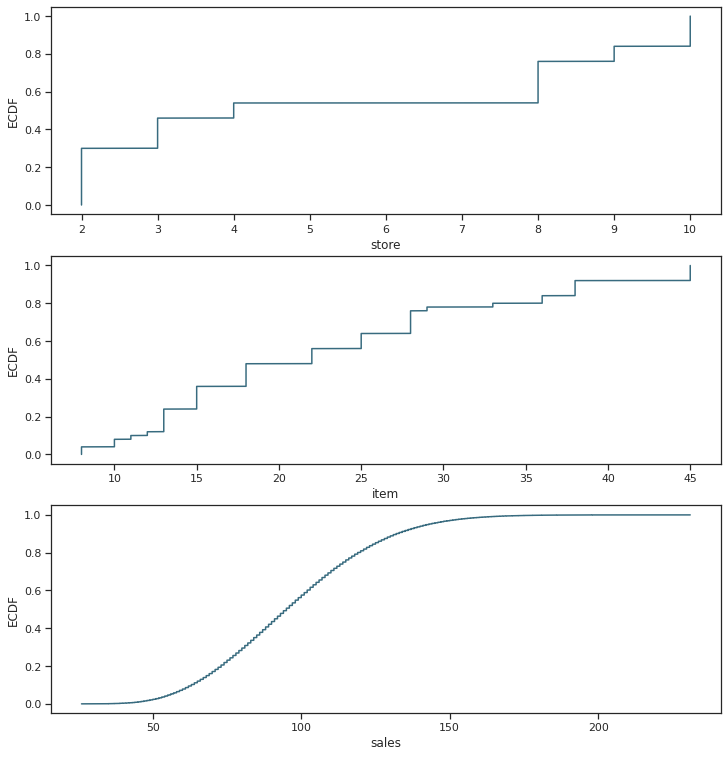

In [43]:
sns.set(style = "ticks")# to format into seaborn 
c = '#386B7F' # basic color for plots
plt.figure(figsize = (12, 13))

plt.subplot(311)
cdf = ECDF(df['store'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('store'); plt.ylabel('ECDF');

plt.subplot(312)
cdf = ECDF(df['item'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('item'); plt.ylabel('ECDF');

plt.subplot(313)
cdf = ECDF(df['sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('sales'); plt.ylabel('ECDF');

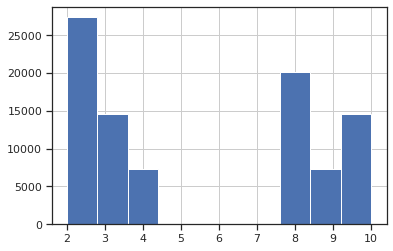

In [44]:
df['store'].hist()

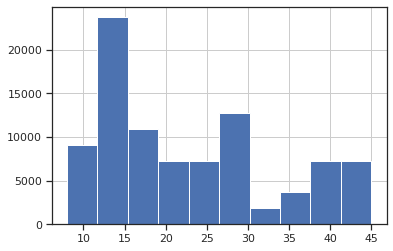

In [45]:
df['item'].hist()

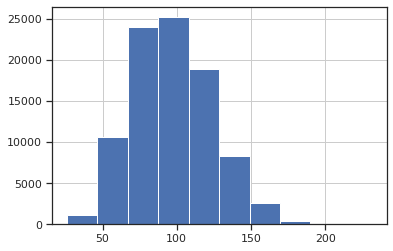

In [46]:
df['sales'].hist()

In [49]:
train = pd.read_csv('train.csv', parse_dates = True,
                    low_memory = False, index_col = 'date')

In [51]:
# data extraction
train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day
train['WeekOfYear'] = train.index.weekofyear
train['DayOfYear'] = train.index.dayofweek
train['is_month_start'] = train.index.is_month_start
train['is_month_end'] = train.index.is_month_end
train['is_month_end'] = train.index.is_month_end
train['days_from_epoch'] = (train.index - pd.Timestamp("1970-01-01")).days

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """


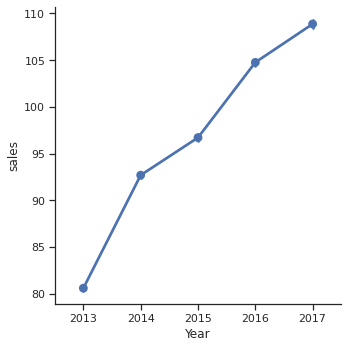

In [52]:
# sales trends
sns.catplot(data = train, x = 'Year', y = "sales", kind='point')

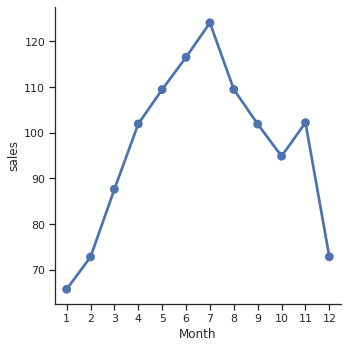

In [53]:
# sales trends
# sns.factorplot(data = train, x = 'Month', y = "sales")
sns.catplot(data = train, x = 'Month', y = "sales", kind='point')

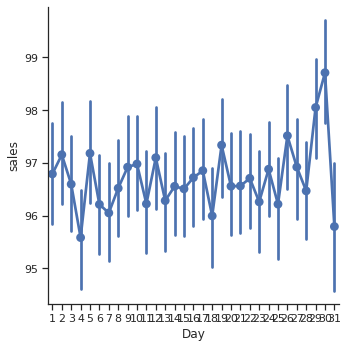

In [54]:
# sales trends
# sns.factorplot(data = train, x = 'Day', y = "sales")
sns.catplot(data = train, x = 'Day', y = "sales", kind='point')

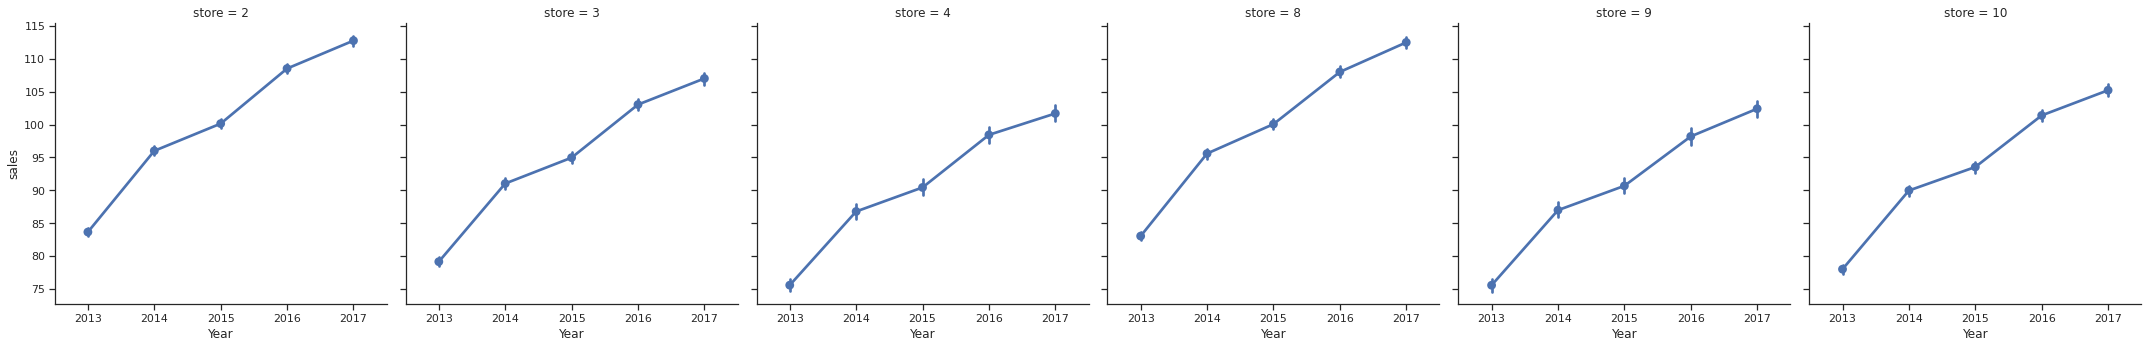

In [55]:
# sales trends, for each store
sns.catplot(data = train, x = 'Year', y = "sales", col='store', kind='point')

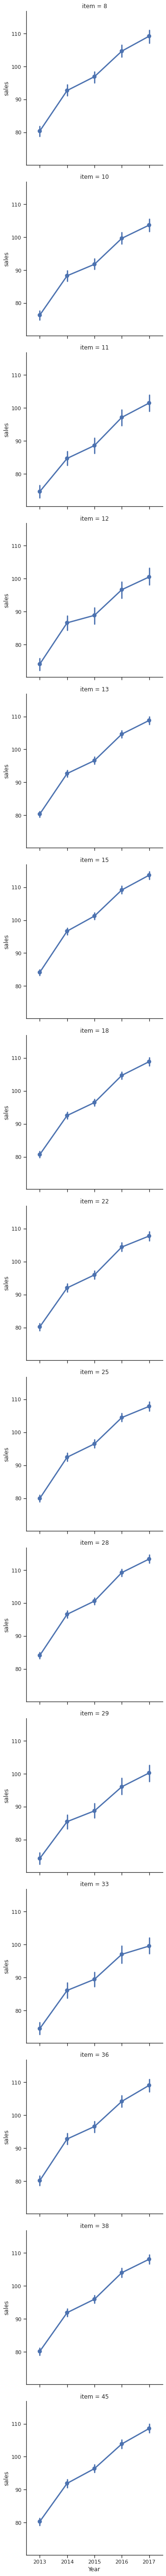

In [56]:
# sales trends, for each item
sns.catplot(data = train, x = 'Year', y = "sales", row='item', kind='point')

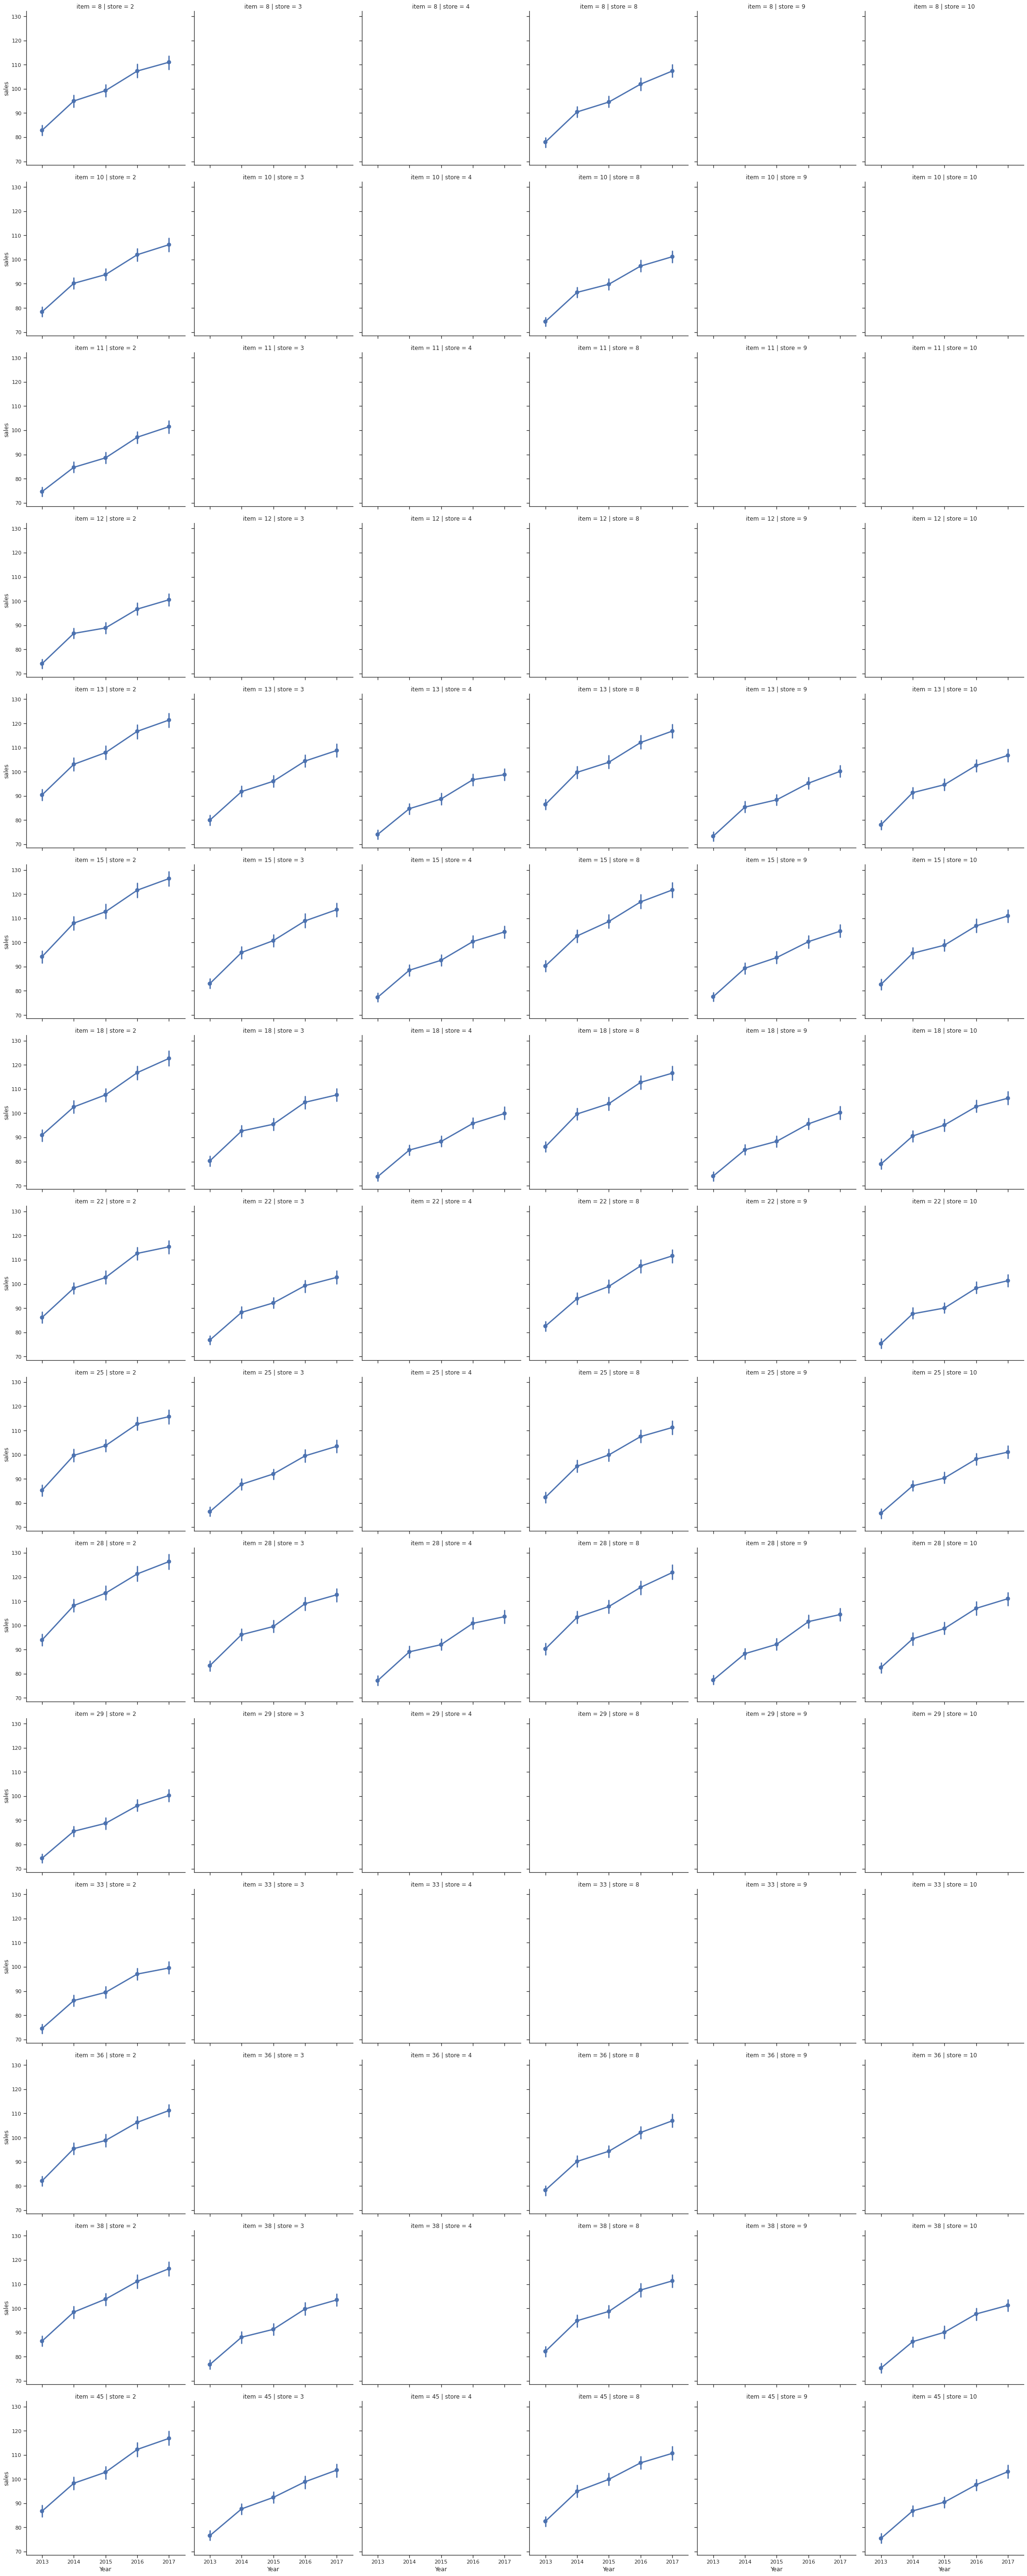

In [57]:
# sales trends, for each store x item
sns.catplot(data = train, x = 'Year', y = "sales",
            row = 'item', col='store', kind='point')

In [58]:
# timeseries plot
def tsplot(tsdf, title):
    from scipy import signal
    t = tsdf.index
    y = tsdf['sales']
    yd = signal.detrend(y)
    plt.figure(figsize=(4,3))
    plt.plot(t, y, label="Original Data")
    plt.plot(t, y-yd, "--r", label="Trend")
    plt.axis("tight")
    plt.legend(loc=0)
    plt.title(title)
    plt.show()
    return

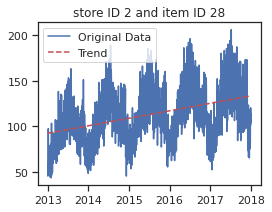

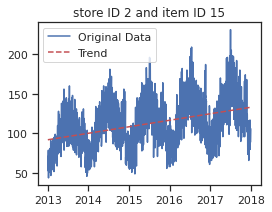

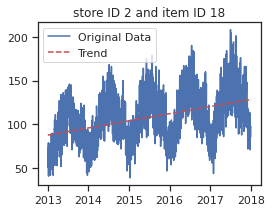

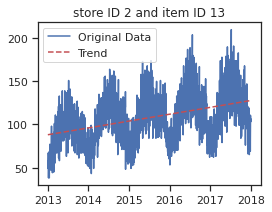

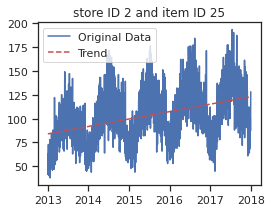

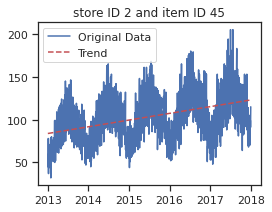

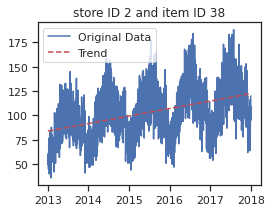

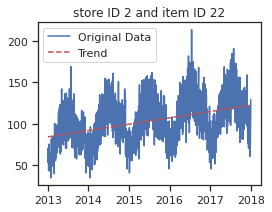

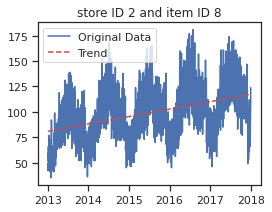

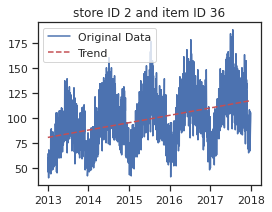

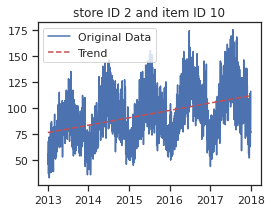

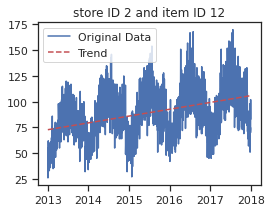

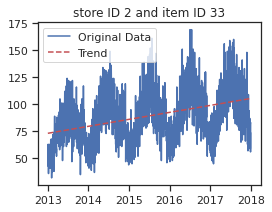

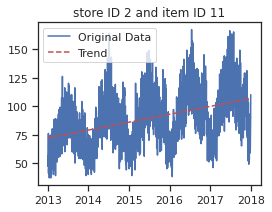

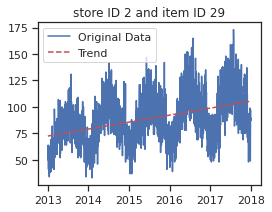

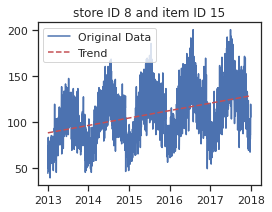

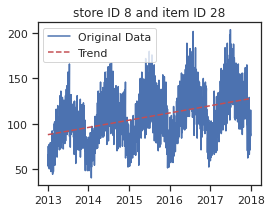

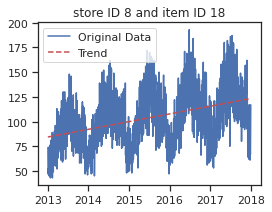

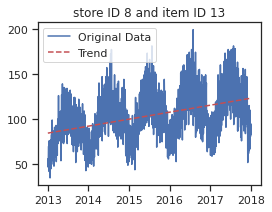

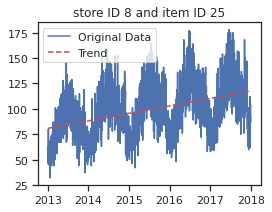

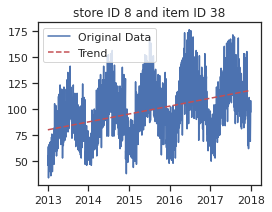

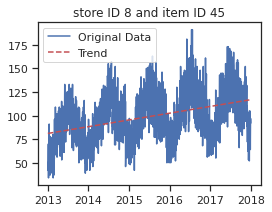

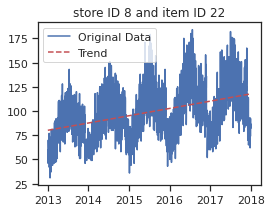

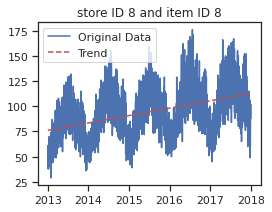

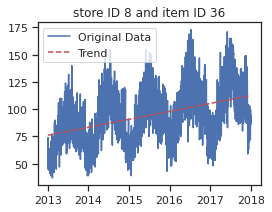

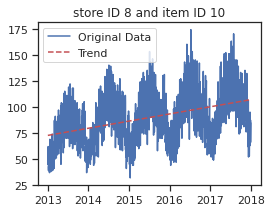

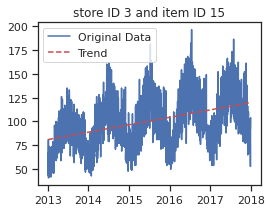

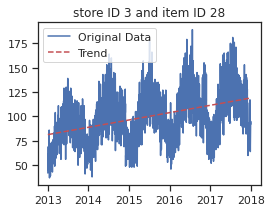

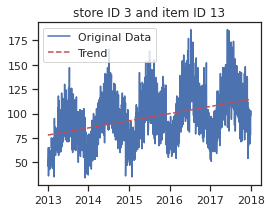

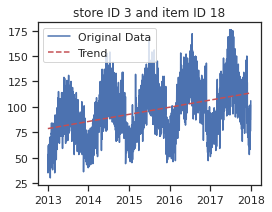

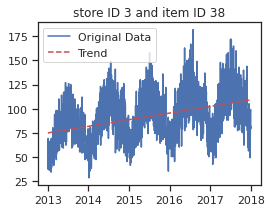

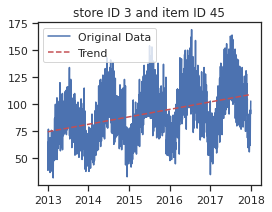

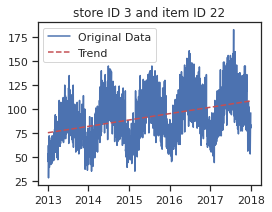

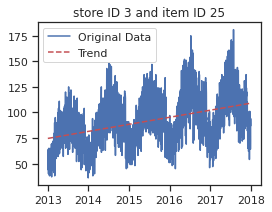

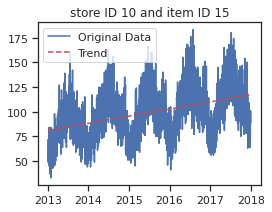

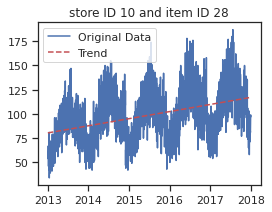

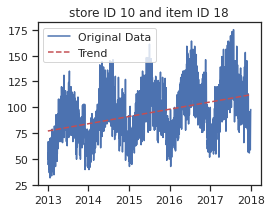

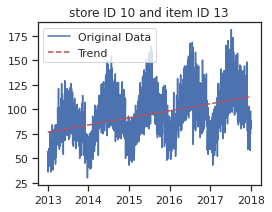

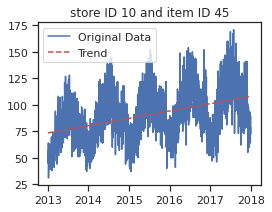

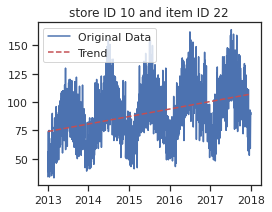

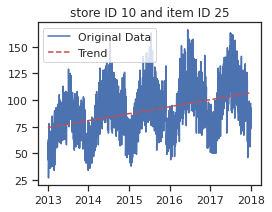

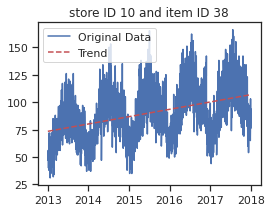

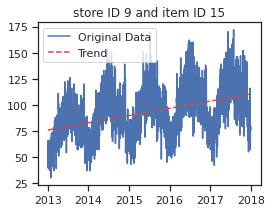

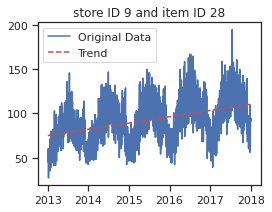

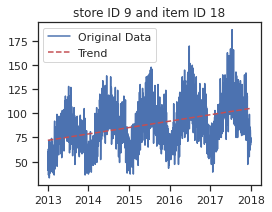

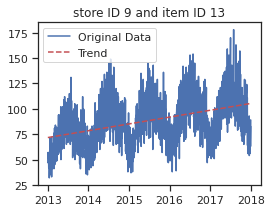

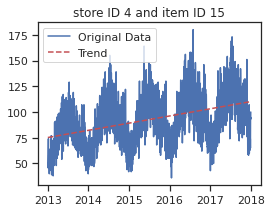

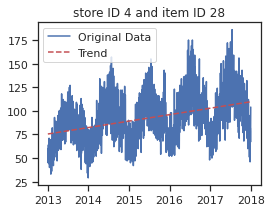

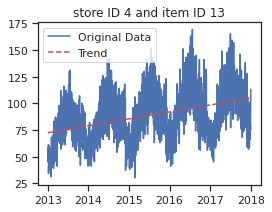

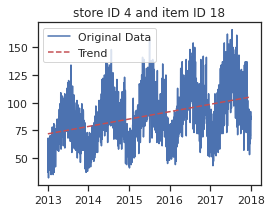

In [64]:
for s in train['store'].unique():
    tmpdf = train[train['store']==s]
    # for i in tmpdf['item'].unique():
    for i in train[train['store'] == s]['item'].unique():
        tmp2df = tmpdf[tmpdf['item']==i]
        tsplot(tmp2df, "store ID {} and item ID {}".format(s,i))

Pasamos a entrenar el modelo:

In [65]:
train.columns

Index(['store', 'item', 'sales', 'Year', 'Month', 'Day', 'WeekOfYear',
       'DayOfYear', 'is_month_start', 'is_month_end', 'days_from_epoch'],
      dtype='object')

In [67]:
train_X = train.copy(deep=True)
del train_X['sales']
train_y = train['sales']

In [69]:
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor(n_estimators=100, learning_rate=0.25,
        max_depth=1).fit(train_X, train_y)

In [71]:
clf

GradientBoostingRegressor(learning_rate=0.25, max_depth=1)

In [98]:
dates = pd.date_range(start = '2018-01-01', end = '2018-03-31')

result = {"store":[],	"item":[],	"date":[]}

store = []

for s in train['store'].unique():
  #print(s)
  for item in train[train['store'] == s]['item'].unique():
    for d in dates:
      #print("{}, {}, {}".format(s,item,d))
      result['date'].append(d)
      result['store'].append(s)
      result['item'].append(item)



In [110]:
test = pd.DataFrame(result)
test

store  item       date
0         2    28 2018-01-01
1         2    28 2018-01-02
2         2    28 2018-01-03
3         2    28 2018-01-04
4         2    28 2018-01-05
...     ...   ...        ...
4495      4    18 2018-03-27
4496      4    18 2018-03-28
4497      4    18 2018-03-29
4498      4    18 2018-03-30
4499      4    18 2018-03-31

[4500 rows x 3 columns]

In [113]:
test.to_csv('test')

In [115]:
test = pd.read_csv('test', parse_dates = True,
                    low_memory = False, index_col = 'date')

In [116]:
for store in test['store'].unique():
  num_product = len(test[test['store'] == store]['item'].unique())
  print("Store ID:{} tiene {} productos".format(store, num_product))

Store ID:2 tiene 15 productos
Store ID:8 tiene 11 productos
Store ID:3 tiene 8 productos
Store ID:10 tiene 8 productos
Store ID:9 tiene 4 productos
Store ID:4 tiene 4 productos


In [117]:
# data extraction
test['Year'] = test.index.year
test['Month'] = test.index.month
test['Day'] = test.index.day
test['WeekOfYear'] = test.index.weekofyear
test['DayOfYear'] = test.index.dayofweek
test['is_month_start'] = test.index.is_month_start
test['is_month_end'] = test.index.is_month_end
test['is_month_end'] = test.index.is_month_end
test['days_from_epoch'] = (test.index - pd.Timestamp("1970-01-01")).days

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """


In [121]:
test_X = test.copy(deep=True)
del test_X['Unnamed: 0']
test_X.columns

Index(['store', 'item', 'Year', 'Month', 'Day', 'WeekOfYear', 'DayOfYear',
       'is_month_start', 'is_month_end', 'days_from_epoch'],
      dtype='object')

In [125]:
test

Unnamed: 0  store  ...  is_month_end  days_from_epoch
date                           ...                               
2018-01-01           0      2  ...         False            17532
2018-01-02           1      2  ...         False            17533
2018-01-03           2      2  ...         False            17534
2018-01-04           3      2  ...         False            17535
2018-01-05           4      2  ...         False            17536
...                ...    ...  ...           ...              ...
2018-03-27        4495      4  ...         False            17617
2018-03-28        4496      4  ...         False            17618
2018-03-29        4497      4  ...         False            17619
2018-03-30        4498      4  ...         False            17620
2018-03-31        4499      4  ...          True            17621

[4500 rows x 11 columns]

In [122]:
pred_y = clf.predict(test_X)

In [123]:
print ("Predict ",pred_y)

Predict  [ 71.11502642  82.37227298  82.37227298 ... 102.5628902  108.55473789
 114.62096902]


In [139]:
test2 = pd.read_csv('test')

4500

In [150]:
# Write submission file
out_df = pd.DataFrame({'store': list(test['store']), 'item': list(test['item']), 'date': list(test2['date']),  'prediction': pred_y})
out_df
out_df.to_csv('submission.csv', index=False)

store  item        date  prediction
0         2    28  2018-01-01        71.1
1         2    28  2018-01-02        82.4
2         2    28  2018-01-03        82.4
3         2    28  2018-01-04        88.7
4         2    28  2018-01-05        94.6
...     ...   ...         ...         ...
4495      4    18  2018-03-27        96.3
4496      4    18  2018-03-28        96.3
4497      4    18  2018-03-29       102.6
4498      4    18  2018-03-30       108.6
4499      4    18  2018-03-31       114.6

[4500 rows x 4 columns]

In [153]:
# timeseries plot
def tsplot2(tsdf, title):
    from scipy import signal
    t = tsdf.index
    y = tsdf['prediction']
    yd = signal.detrend(y)
    plt.figure(figsize=(4,3))
    plt.plot(t, y, label="Original Data")
    plt.plot(t, y-yd, "--r", label="Trend")
    plt.axis("tight")
    plt.legend(loc=0)
    plt.title(title)
    plt.show()
    return

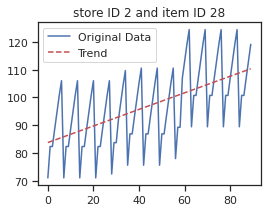

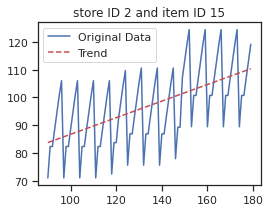

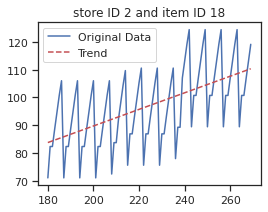

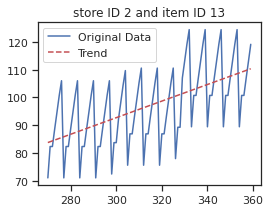

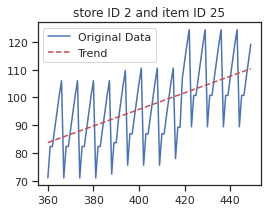

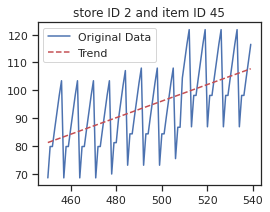

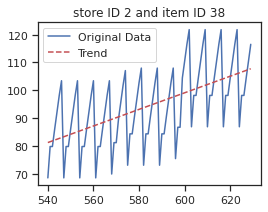

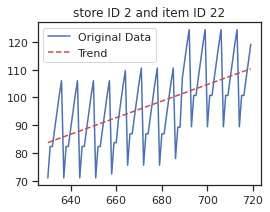

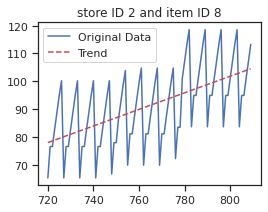

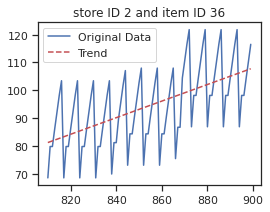

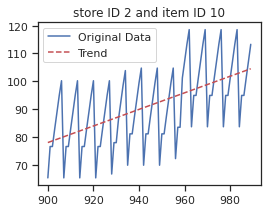

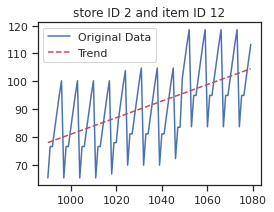

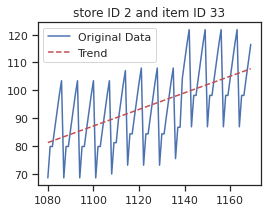

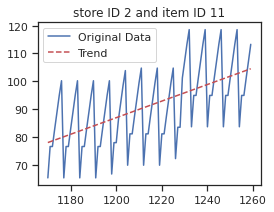

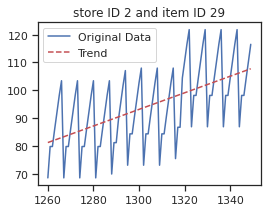

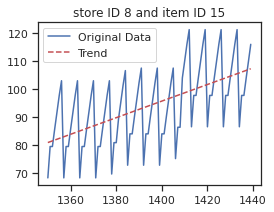

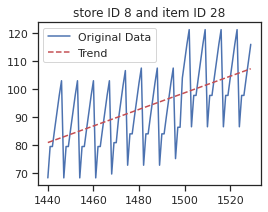

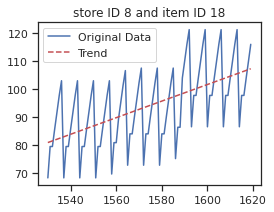

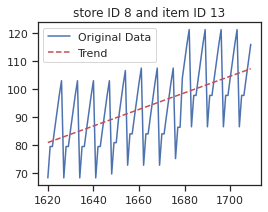

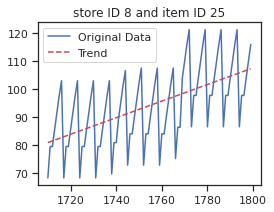

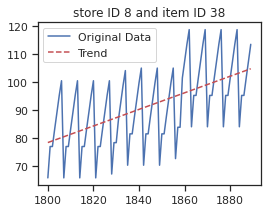

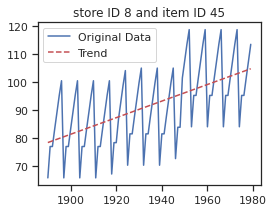

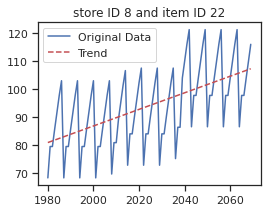

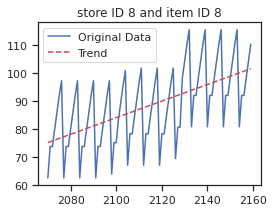

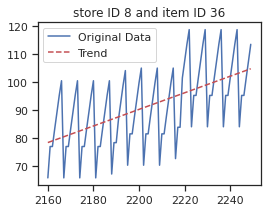

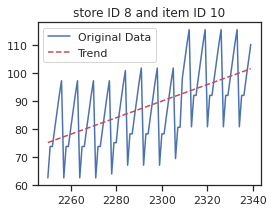

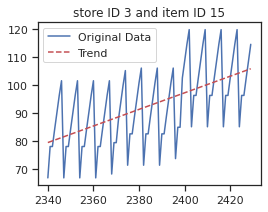

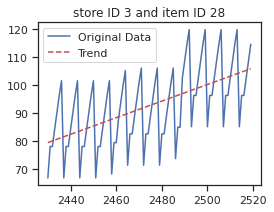

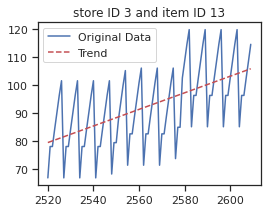

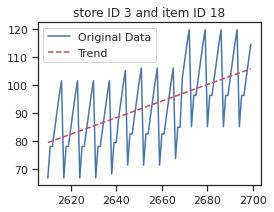

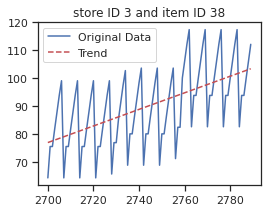

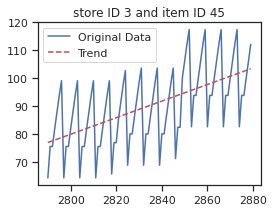

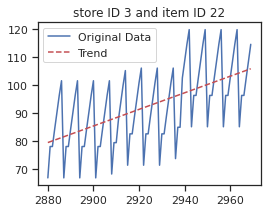

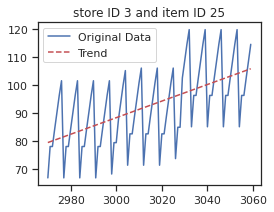

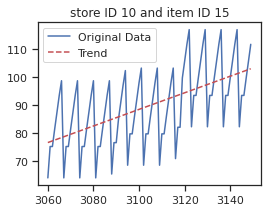

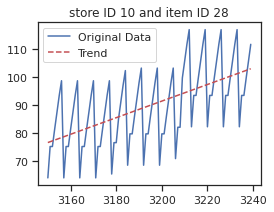

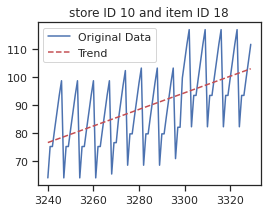

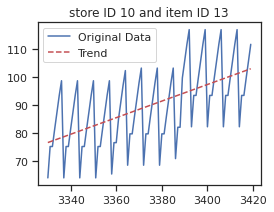

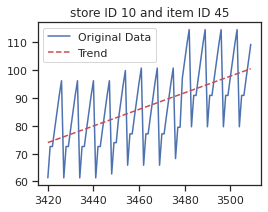

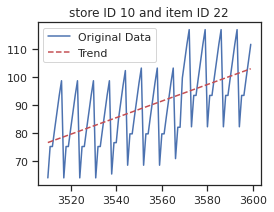

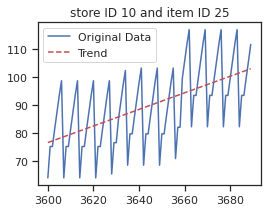

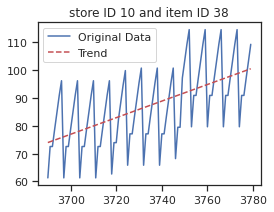

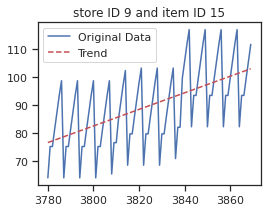

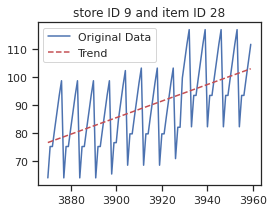

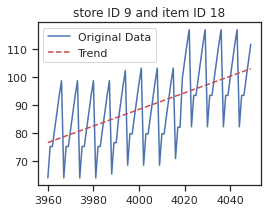

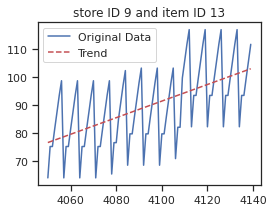

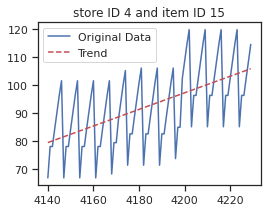

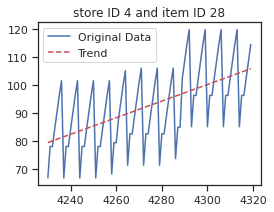

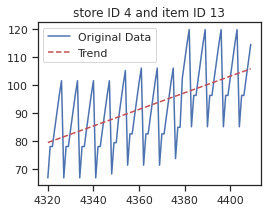

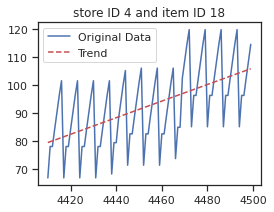

In [155]:
for s in out_df['store'].unique():
    tmpdf = out_df[out_df['store']==s]
    # for i in tmpdf['item'].unique():
    for i in out_df[out_df['store'] == s]['item'].unique():
        tmp2df = tmpdf[tmpdf['item']==i]
        tsplot2(tmp2df, "store ID {} and item ID {}".format(s,i))

Grid Search for the model

In [162]:
# example of grid searching key hyperparameters for gradient boosting on a classification dataset
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split


# define dataset
GBR=GradientBoostingRegressor()
search_grid={'n_estimators':[100,200,300,400,500],'learning_rate':[.1,.2,.3],'max_depth':[1,2,4],'subsample':[.5,.75,1],'random_state':[1]}
search=GridSearchCV(estimator=GBR,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=3)

In [165]:
search.fit(train_X, train_y)
search.best_params_

{'learning_rate': 0.3,
 'max_depth': 2,
 'n_estimators': 500,
 'random_state': 1,
 'subsample': 0.75}

In [166]:
from sklearn.ensemble import GradientBoostingRegressor

clf2 = GradientBoostingRegressor(n_estimators = 500, learning_rate=0.3,
        max_depth=2,random_state=1,subsample = 0.75).fit(train_X, train_y)

In [172]:
pred_y2 = clf2.predict(test_X)

In [173]:
# Write submission file
out_df2 = pd.DataFrame({'store': list(test['store']), 'item': list(test['item']), 'date': list(test2['date']),  'prediction': pred_y2})
out_df2.to_csv('prediction.csv', index=False)

In [174]:
out_df2

store  item        date  prediction
0         2    28  2018-01-01        82.0
1         2    28  2018-01-02        92.4
2         2    28  2018-01-03        92.4
3         2    28  2018-01-04        98.5
4         2    28  2018-01-05       105.5
...     ...   ...         ...         ...
4495      4    18  2018-03-27        92.8
4496      4    18  2018-03-28        92.3
4497      4    18  2018-03-29        99.8
4498      4    18  2018-03-30       107.2
4499      4    18  2018-03-31       113.3

[4500 rows x 4 columns]

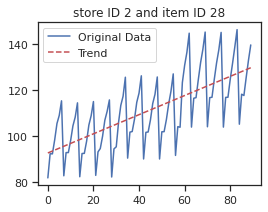

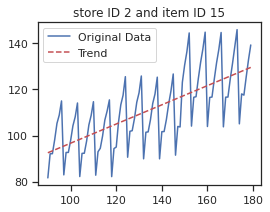

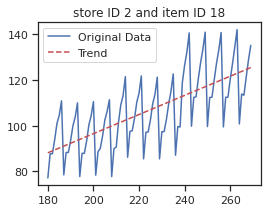

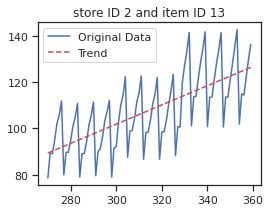

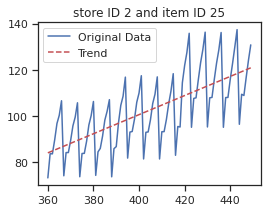

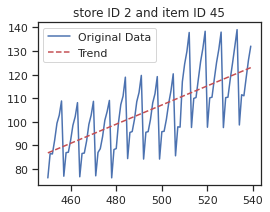

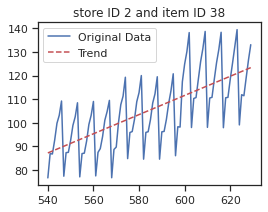

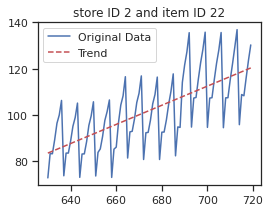

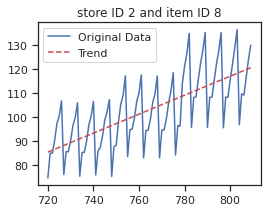

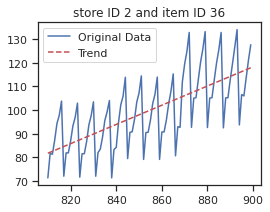

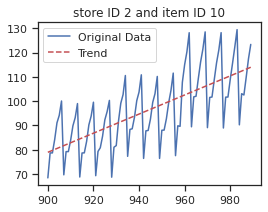

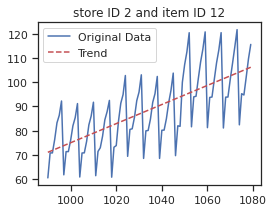

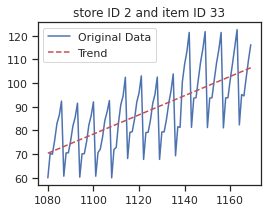

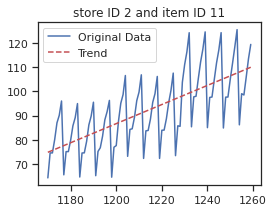

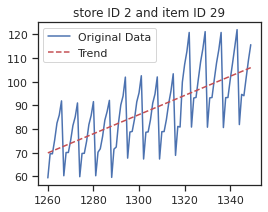

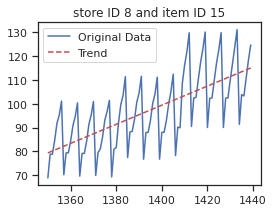

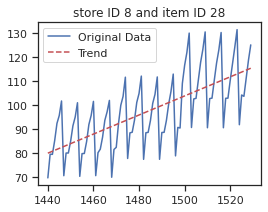

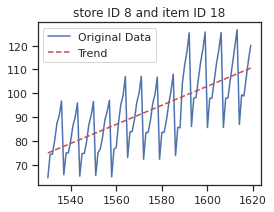

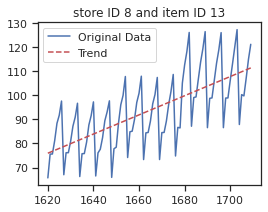

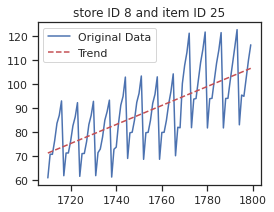

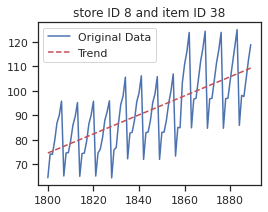

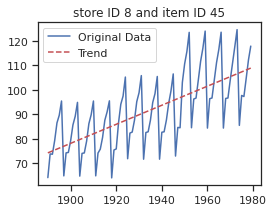

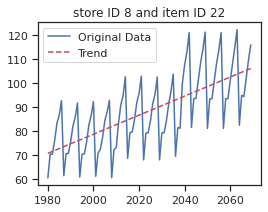

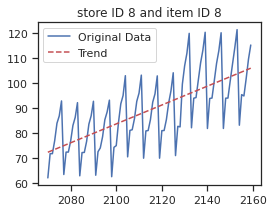

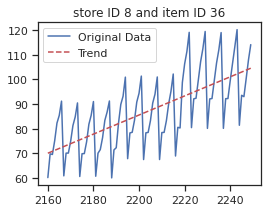

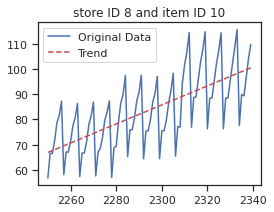

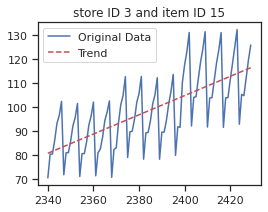

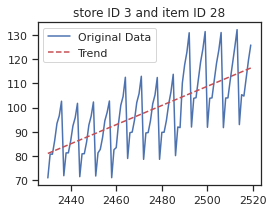

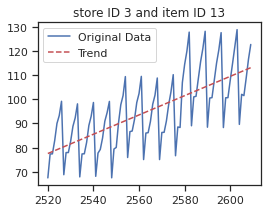

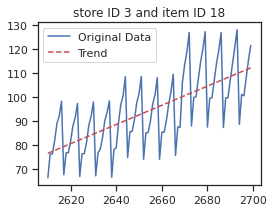

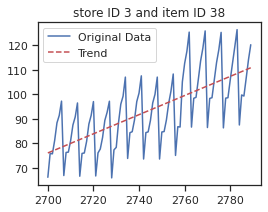

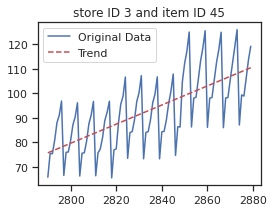

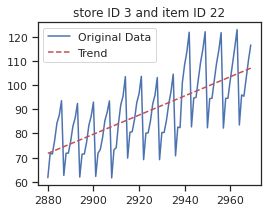

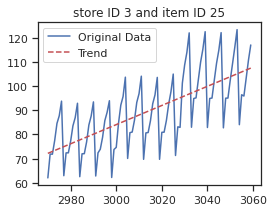

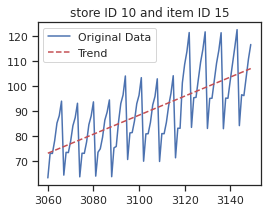

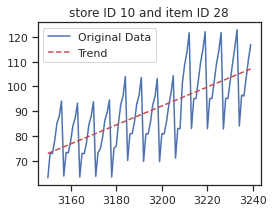

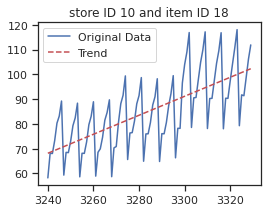

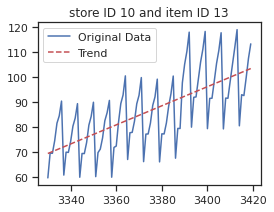

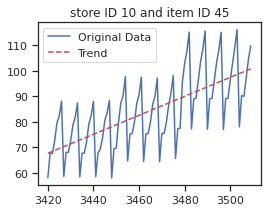

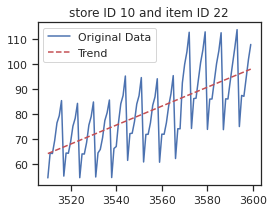

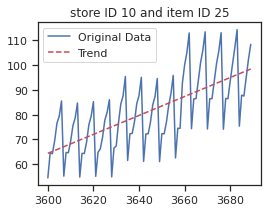

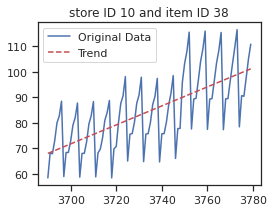

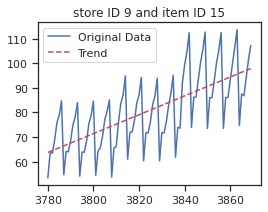

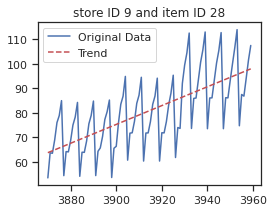

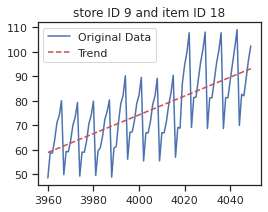

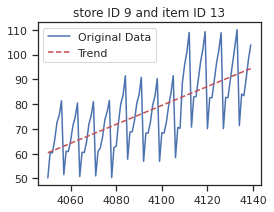

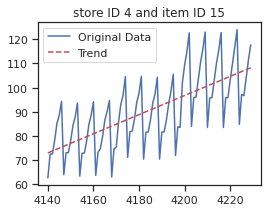

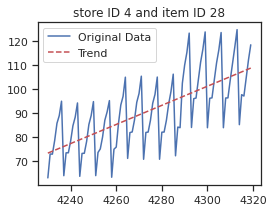

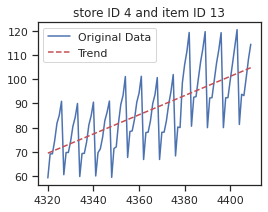

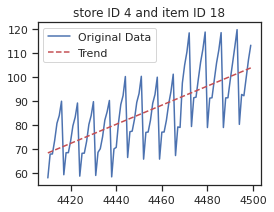

In [176]:
for s in out_df2['store'].unique():
    tmpdf = out_df2[out_df2['store']==s]
    for i in out_df2[out_df2['store'] == s]['item'].unique():
        tmp2df = tmpdf[tmpdf['item']==i]
        tsplot2(tmp2df, "store ID {} and item ID {}".format(s,i))